## Importing necessary libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings

In [77]:
df = pd.read_csv("../data/data.csv")

In [78]:
df.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
1,2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2,2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
3,2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
4,2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000


## Data Preparation

In [79]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [80]:
df.set_index('DATE',inplace=True)

In [81]:
df.head()

,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
DATE,,,,,
2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000


In [82]:
df = df[['NASDAQ.AAPL']]

In [83]:
df

,NASDAQ.AAPL
DATE,
2017-04-03 13:30:00,143.6800
2017-04-03 13:31:00,143.7000
2017-04-03 13:32:00,143.6901
2017-04-03 13:33:00,143.6400
2017-04-03 13:34:00,143.6600
...,...
2017-08-31 19:56:00,164.1100
2017-08-31 19:57:00,164.1200
2017-08-31 19:58:00,164.0100


## Data Visualization

<AxesSubplot:xlabel='DATE'>

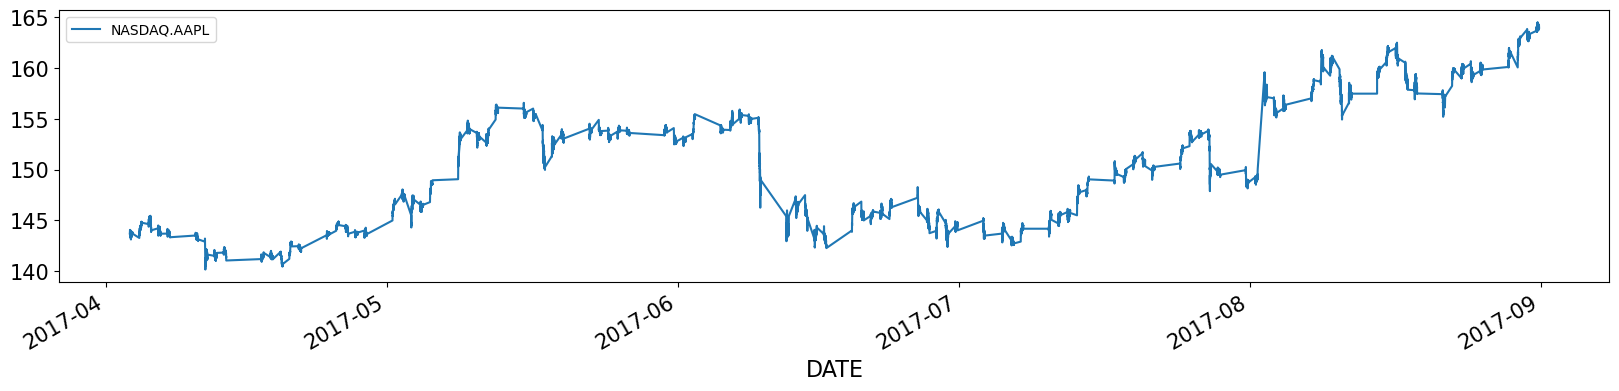

In [84]:
df.plot(figsize=(20,4))

In [85]:
df.index.month_name().unique()

Index(['April', 'May', 'June', 'July', 'August'], dtype='object', name='DATE')

In [86]:
df.index.day_name().unique()

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], dtype='object', name='DATE')

            NASDAQ.AAPL
DATE                   
2017-04-03   143.641453
2017-04-04   144.297354
2017-04-05   145.039701
2017-04-06   143.993487
2017-04-07   143.780683
...                 ...
2017-08-25   159.943552
2017-08-28   161.329826
2017-08-29   162.334460
2017-08-30   163.183604
2017-08-31   163.977656

[109 rows x 1 columns]


<AxesSubplot:xlabel='DATE'>

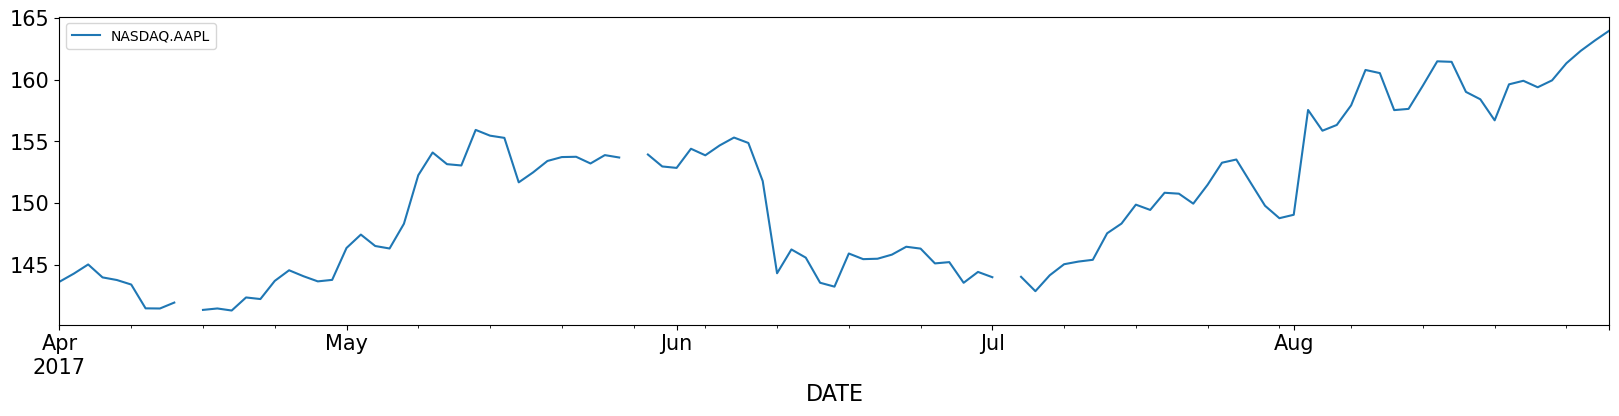

In [87]:
freq='B'
print(df.resample(freq).mean())
df.resample(freq).mean().plot(figsize=(20,4))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


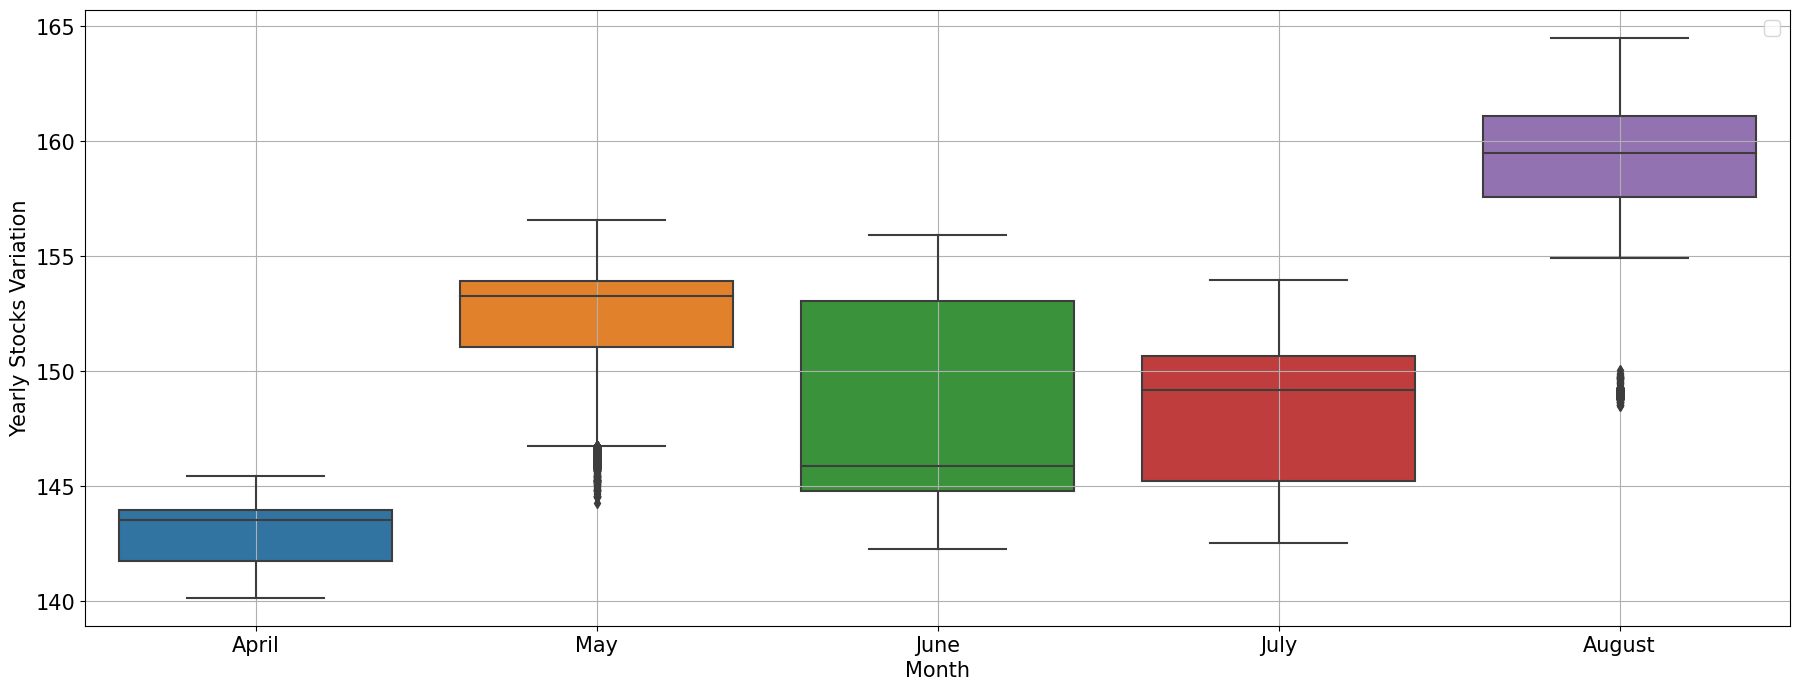

In [88]:
## Monthly Boxplot
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)

plt.grid()
plt.xlabel('Month',fontsize=15)
plt.ylabel('Yearly Stocks Variation',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

In [89]:
data=df.resample(freq).mean()

In [90]:
data[data['NASDAQ.AAPL'].isnull()]

,NASDAQ.AAPL
DATE,
2017-04-14,NaN
2017-05-29,NaN
2017-07-04,NaN


<AxesSubplot:xlabel='DATE'>

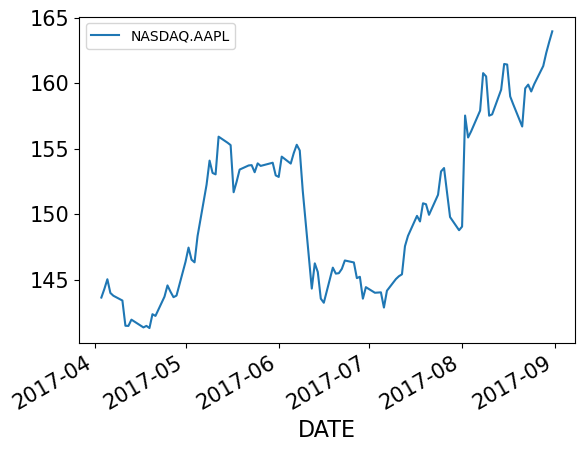

In [91]:
data=data.dropna()
data.plot()

## Decomposition

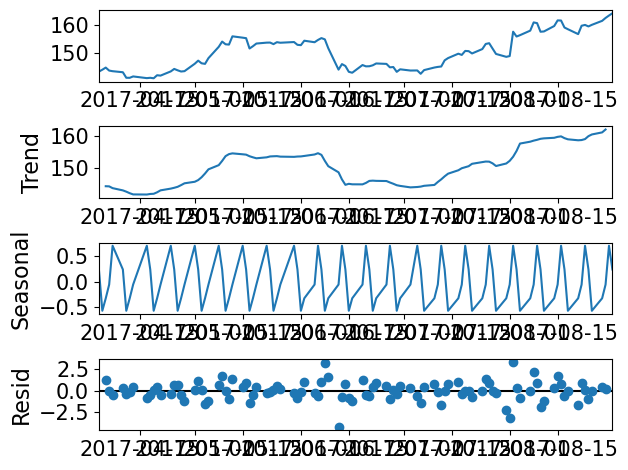

In [92]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data,model='additive',period=5).plot()

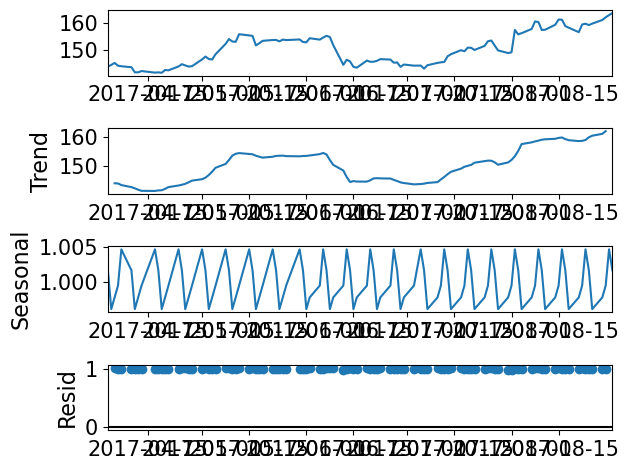

In [93]:
decomposition = seasonal_decompose(data,model='multiplicative',period=5)
decomposition.plot()
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

## Differencing

In [94]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data['NASDAQ.AAPL'])

def adfuller_test(stock):
    result=adfuller(stock)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [95]:
adfuller_test(data['NASDAQ.AAPL'])

ADF Test Statistic : -0.7837505731596663
p-value : 0.8238486778769876
#Lags Used : 0
Number of Observations Used : 105
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [96]:
data['NASDAQ.AAPL First Difference']=data['NASDAQ.AAPL']-data['NASDAQ.AAPL'].shift(1)

In [97]:
adfuller_test(data['NASDAQ.AAPL First Difference'].dropna())

ADF Test Statistic : -7.9492169138398605
p-value : 3.158936208558774e-12
#Lags Used : 1
Number of Observations Used : 103
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## PLOT ACF and PACF

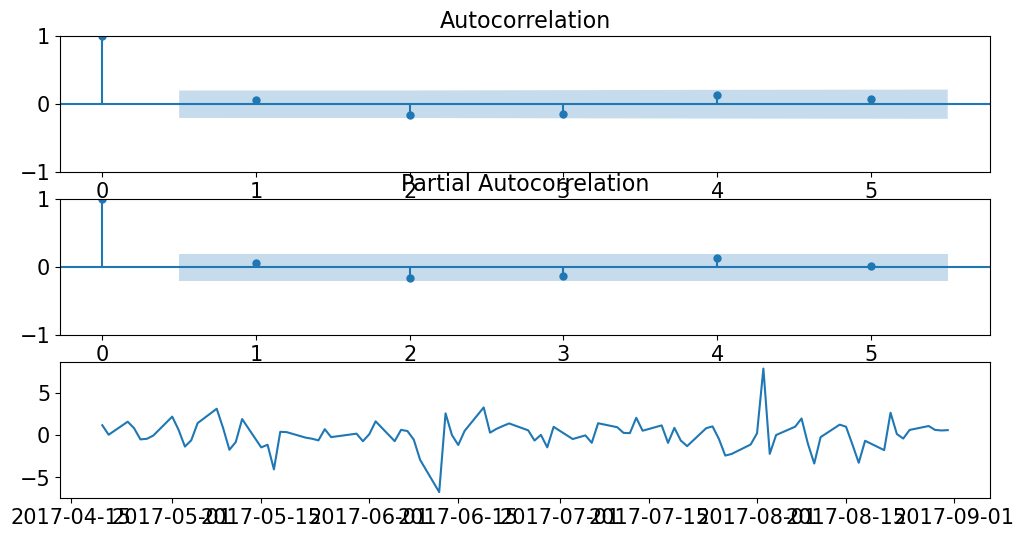

In [98]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Stationary data
data['station'] = data['NASDAQ.AAPL'] - data['NASDAQ.AAPL'].rolling(12).mean()

fig, ax = plt.subplots(3, figsize=(12,6))
x = (data.station.dropna() - data.station.dropna().shift(1)).dropna()
ax[0] = plot_acf(x, ax=ax[0], lags=5)
ax[1] = plot_pacf(x, ax=ax[1], lags=5)
ax[2].plot(x)

## Train Test Split

In [99]:
data.drop('NASDAQ.AAPL First Difference',axis=1,inplace=True)
data.drop('station',axis=1,inplace=True)

In [204]:
i=0.80
per=int(data.shape[0]*i)
per

84

In [101]:
train = data.iloc[:int(per+1)]
test = data.iloc[int(per+1):]

In [102]:
print(train.shape[0])
train.tail()

80


,NASDAQ.AAPL
DATE,
2017-07-20,150.769762
2017-07-21,149.962519
2017-07-24,151.493231
2017-07-25,153.276377
2017-07-26,153.535515


In [103]:
print(test.shape[0])
test

26


,NASDAQ.AAPL
DATE,
2017-07-27,151.651959
2017-07-28,149.791601
2017-07-31,148.785131
2017-08-01,149.062576
2017-08-02,157.546345
2017-08-03,155.868441
2017-08-04,156.332662
2017-08-07,157.921692
2017-08-08,160.785366


### pdq value iteration

In [104]:
import itertools
p=range(0,7)
d=range(1,2)
q=range(0,7)

pdq_combination=list(itertools.product(p,d,q))

#### for loop over rmse

In [105]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings('ignore')

In [219]:
order1=[]
rmse=[]

for pdq in pdq_combination:
    try:
        model=ARIMA(train['NASDAQ.AAPL'],order=pdq).fit()
        pred=model.predict(start=train.shape[0],end=(train.shape[0]+test.shape[0]-1),dynamic=True)
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
    except:
        continue

results=pd.DataFrame(index=order1,data=rmse,columns=['RMSE']).sort_values('RMSE')
results.head()

,RMSE
"(2, 1, 4)",5.566220
"(0, 1, 5)",5.566348
"(4, 1, 0)",5.589975
"(5, 1, 1)",5.590720
"(1, 1, 4)",5.599831


In [107]:
mod = ARIMA(train['NASDAQ.AAPL'], order=(2,1,4))

results_Arima = mod.fit()

In [138]:
predicted_autoARIMA = results_Arima.predict(start=train.shape[0],end=(train.shape[0]+test.shape[0]-1),dynamic=True)
predicted_autoARIMA=pd.DataFrame(predicted_autoARIMA).set_index(test.index.copy())
predicted_autoARIMA.head()

,predicted_mean
DATE,
2017-07-27,153.277484
2017-07-28,153.811689
2017-07-31,154.598116
2017-08-01,154.621662
2017-08-02,154.201476


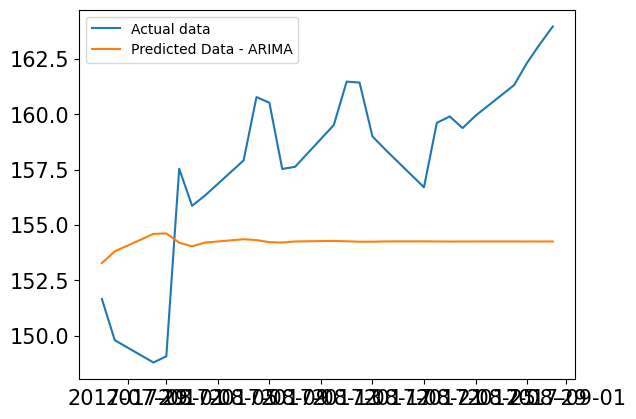

In [139]:
plt.plot(test,label='Actual data')
plt.plot(predicted_autoARIMA,label='Predicted Data - ARIMA')
plt.legend()

## SARIMAX

### Predict P,Q

In [123]:
P=range(0,6)
D=range(1,2)
Q=range(0,6)

pdq_combination=list(itertools.product(P,D,Q))

In [124]:
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [203]:
order1=[]
rmse=[]

for pdq in pdq_combination:
    try:
        model=sm.tsa.statespace.SARIMAX(train,order=(2, 1, 4),seasonal_order=(pdq[0],pdq[1],pdq[2],12)).fit()
        pred=model.predict(start=train.shape[0],end=(train.shape[0]+test.shape[0]-1),dynamic=True)
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
    except Exception as e:
        raise e

results=pd.DataFrame(index=order1,data=rmse,columns=['RMSE']).sort_values('RMSE')
results.head(10)

,RMSE
"(1, 1, 1)",3.356766
"(0, 1, 1)",3.688494
"(0, 1, 2)",3.734289
"(1, 1, 0)",4.386312
"(4, 1, 0)",4.428206
"(1, 1, 2)",4.761279
"(5, 1, 0)",4.963525
"(1, 1, 5)",4.980293
"(0, 1, 4)",5.009780
"(4, 1, 2)",5.060322


In [205]:
model=sm.tsa.statespace.SARIMAX(data,order=(2, 1, 4),seasonal_order=(1,1,1,12)).fit()

In [206]:
predicted_SARIMA = model.predict(start=train.shape[0],end=(train.shape[0]+test.shape[0]-1),dynamic=True)
predicted_SARIMA=pd.DataFrame(predicted_SARIMA).set_index(test.index.copy())
predicted_SARIMA.head()

,predicted_mean
DATE,
2017-07-27,153.516716
2017-07-28,153.550637
2017-07-31,154.491614
2017-08-01,154.277131
2017-08-02,154.209267


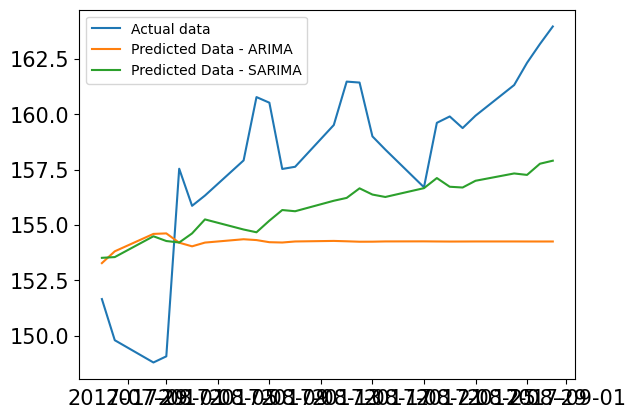

In [220]:
plt.plot(test,label='Actual data')
plt.plot(predicted_autoARIMA,label='Predicted Data - ARIMA')
plt.plot(predicted_SARIMA,label='Predicted Data - SARIMA')
plt.legend()

## Future Forecast

In [215]:
months=10
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,months+1)]
future_data=pd.DataFrame(index=future_dates[1:],columns=data.columns)
forecast=model.forecast(steps=months)
future_stocks = pd.DataFrame(forecast).set_index(future_data.index)
future_stocks.rename(columns = {'predicted_mean':'NASDAQ.AAPL'}, inplace = True)

<AxesSubplot:>

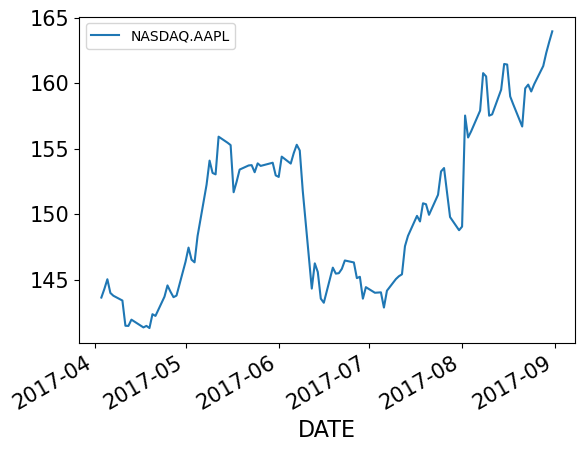

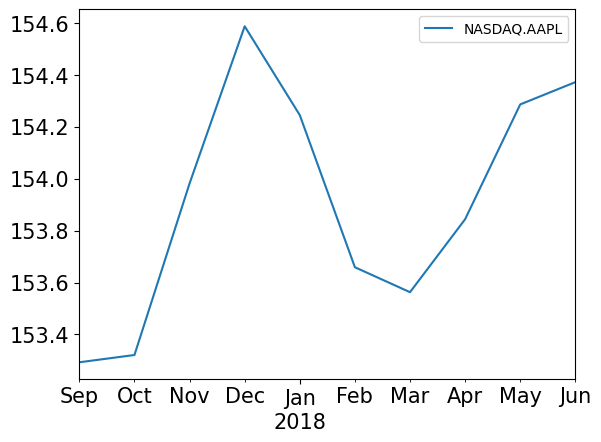

In [221]:
data.plot()
future_stocks.plot()

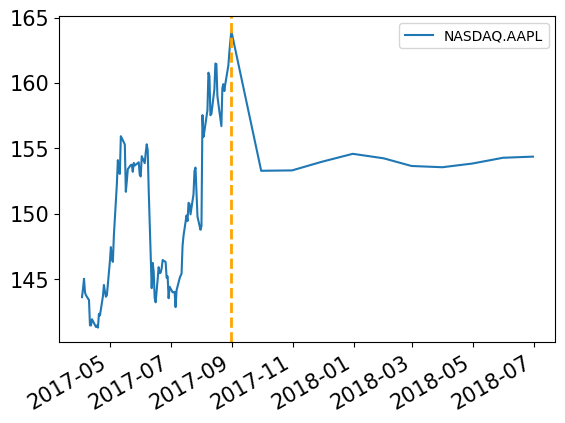

In [217]:
pd.concat([data,future_stocks]).plot()
plt.axvline('2017-08-31',color='orange',lw=2,ls='dashed')

In [222]:
future_stocks

,NASDAQ.AAPL
2017-09-30,153.292590
2017-10-31,153.320651
2017-11-30,153.981930
2017-12-31,154.587727
2018-01-31,154.245246
2018-02-28,153.658913
2018-03-31,153.562745
2018-04-30,153.843990
2018-05-31,154.286554
2018-06-30,154.372444


In [229]:
model.save('../aapl.pkl')